## Linear Regression: House Price 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import preprocessing
import sklearn.linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("C:/Users/rinke/Downloads/data.csv")
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
m_data = data.drop('date',axis=1)

In [7]:
m_data['price']     = data['price'].astype('int64')
m_data['bedrooms']  = data['bedrooms'].astype('int64')
m_data['bathrooms'] = data['bathrooms'].astype('int64')
m_data['floors']    = data['floors'].astype('int64')
m_data['street']    = data['street'].astype('string')
m_data['city']      = data['city'].astype('string')
m_data['statezip']  = data['statezip'].astype('string')
m_data['country']   = data['country'].astype('string')

In [8]:
(m_data.price == 0).sum()

49

In [9]:
import numpy as np

m_data['price'].replace(0, np.nan, inplace = True)

In [10]:
m_data.isnull().sum()

price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [11]:
m_data.dropna(inplace=True)
(m_data.price == 0).sum()

0

In [12]:
m_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


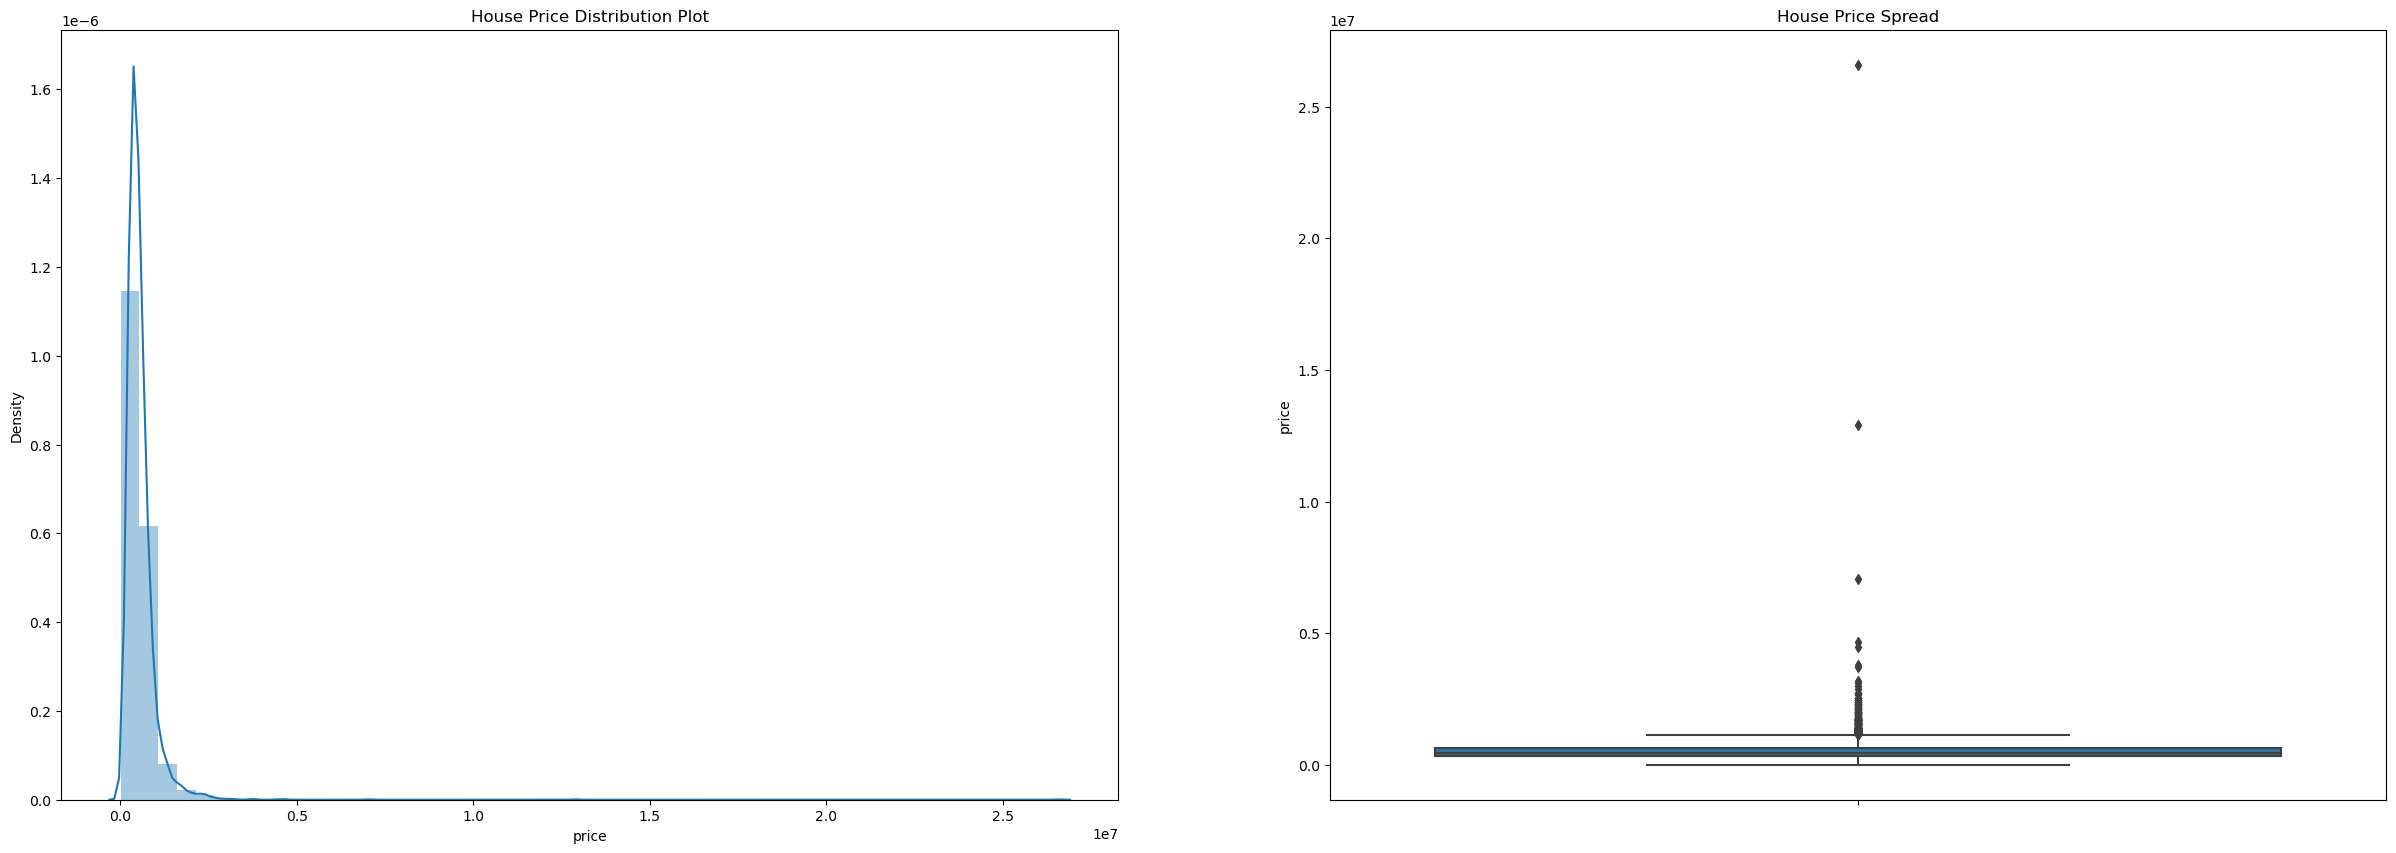

In [15]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(m_data["price"])

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=m_data["price"])

plt.show()

In [21]:
# make function for count plot and scatter plots for Categorical features

def Categorical_Plot(column,rotation=0):
    
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        pd.value_counts(m_data[column]).plot(kind='bar')
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Count\n", fontsize = 15)

        plt.subplot(1, 2, 2)
        sns.barplot(x = m_data[column], y = data.price)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

In [22]:
# make function for box plots and scatter plots for Numerical features

def Numerical_Plot(column):
    
        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(m_data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.scatterplot(x=m_data[column],y=m_data["price"],hue=m_data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

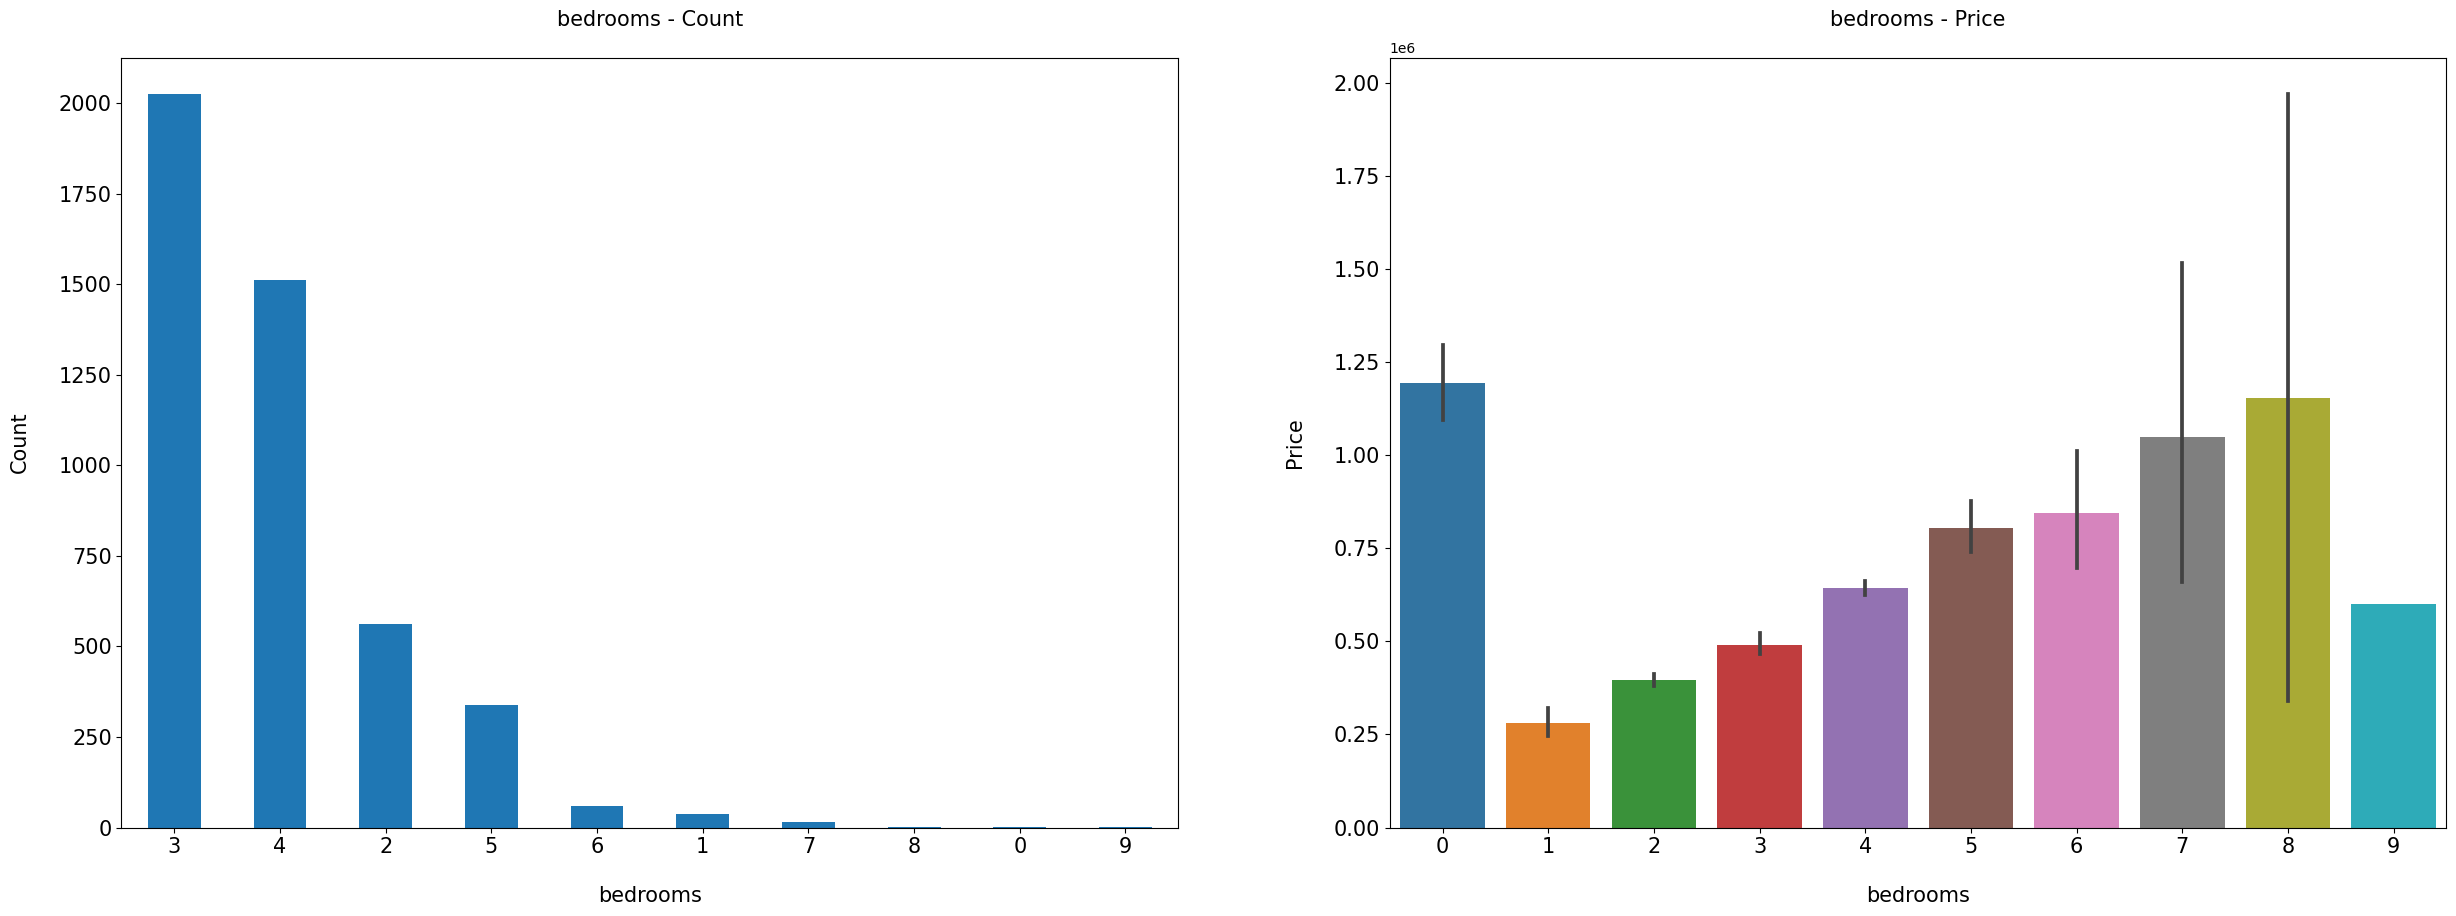

In [23]:
Categorical_Plot("bedrooms")

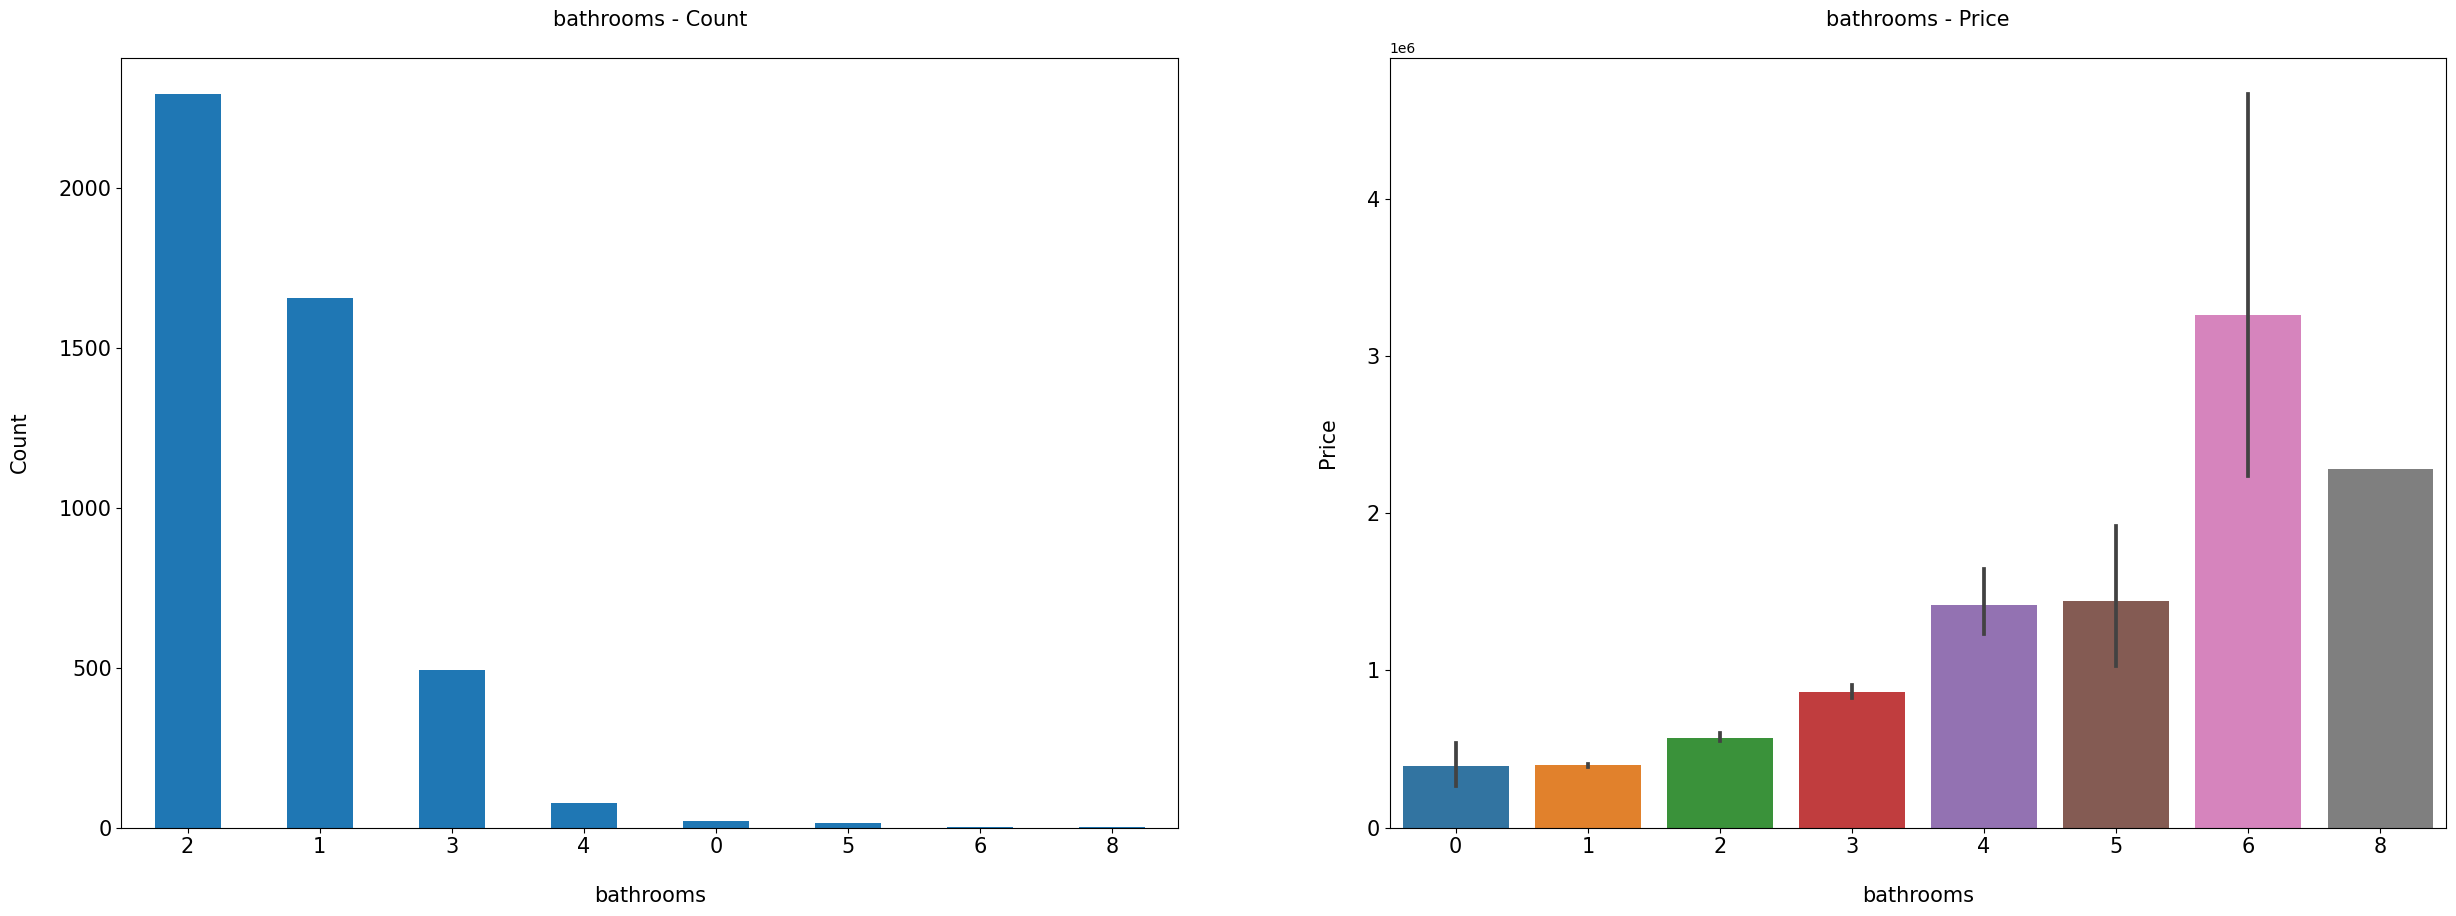

In [24]:
Categorical_Plot("bathrooms")

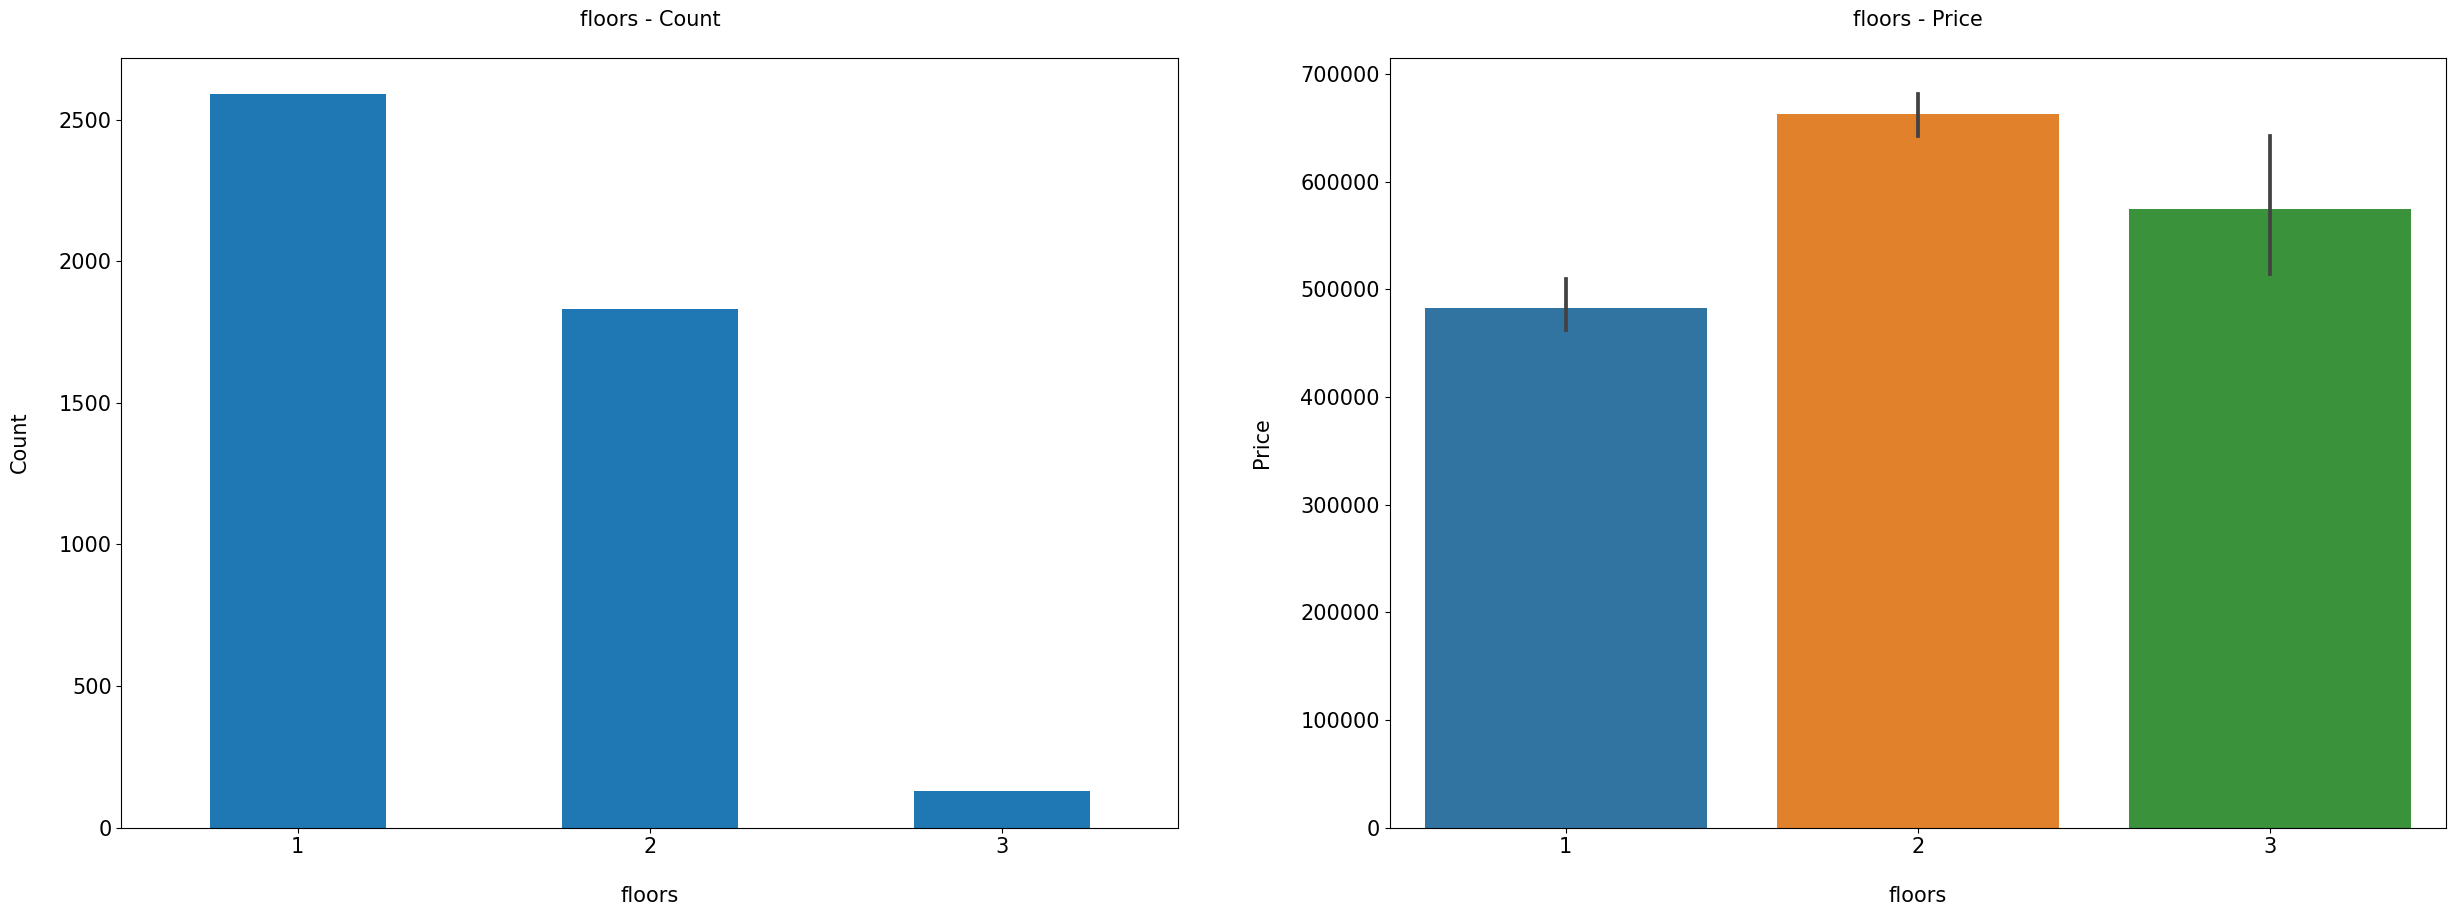

In [25]:
Categorical_Plot("floors")

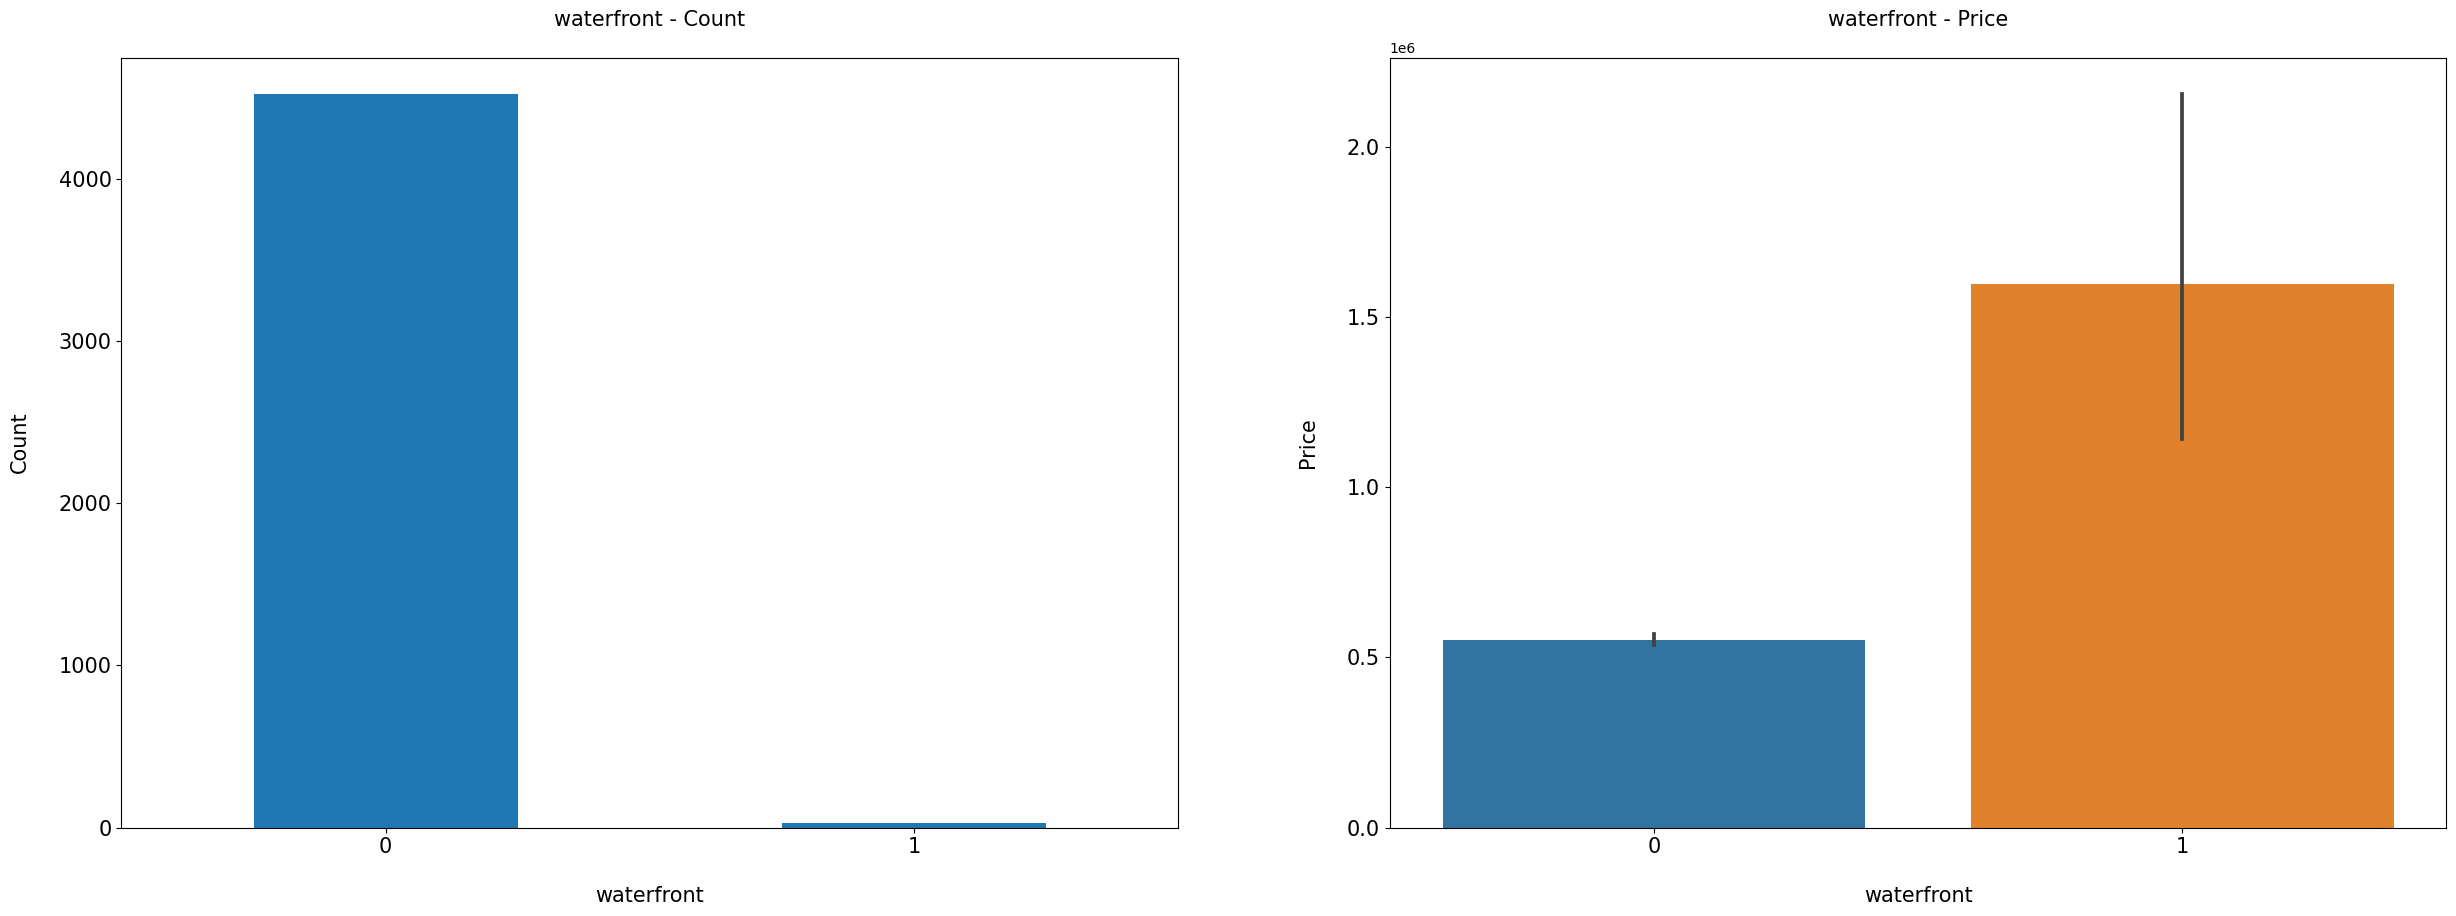

In [26]:
Categorical_Plot("waterfront")

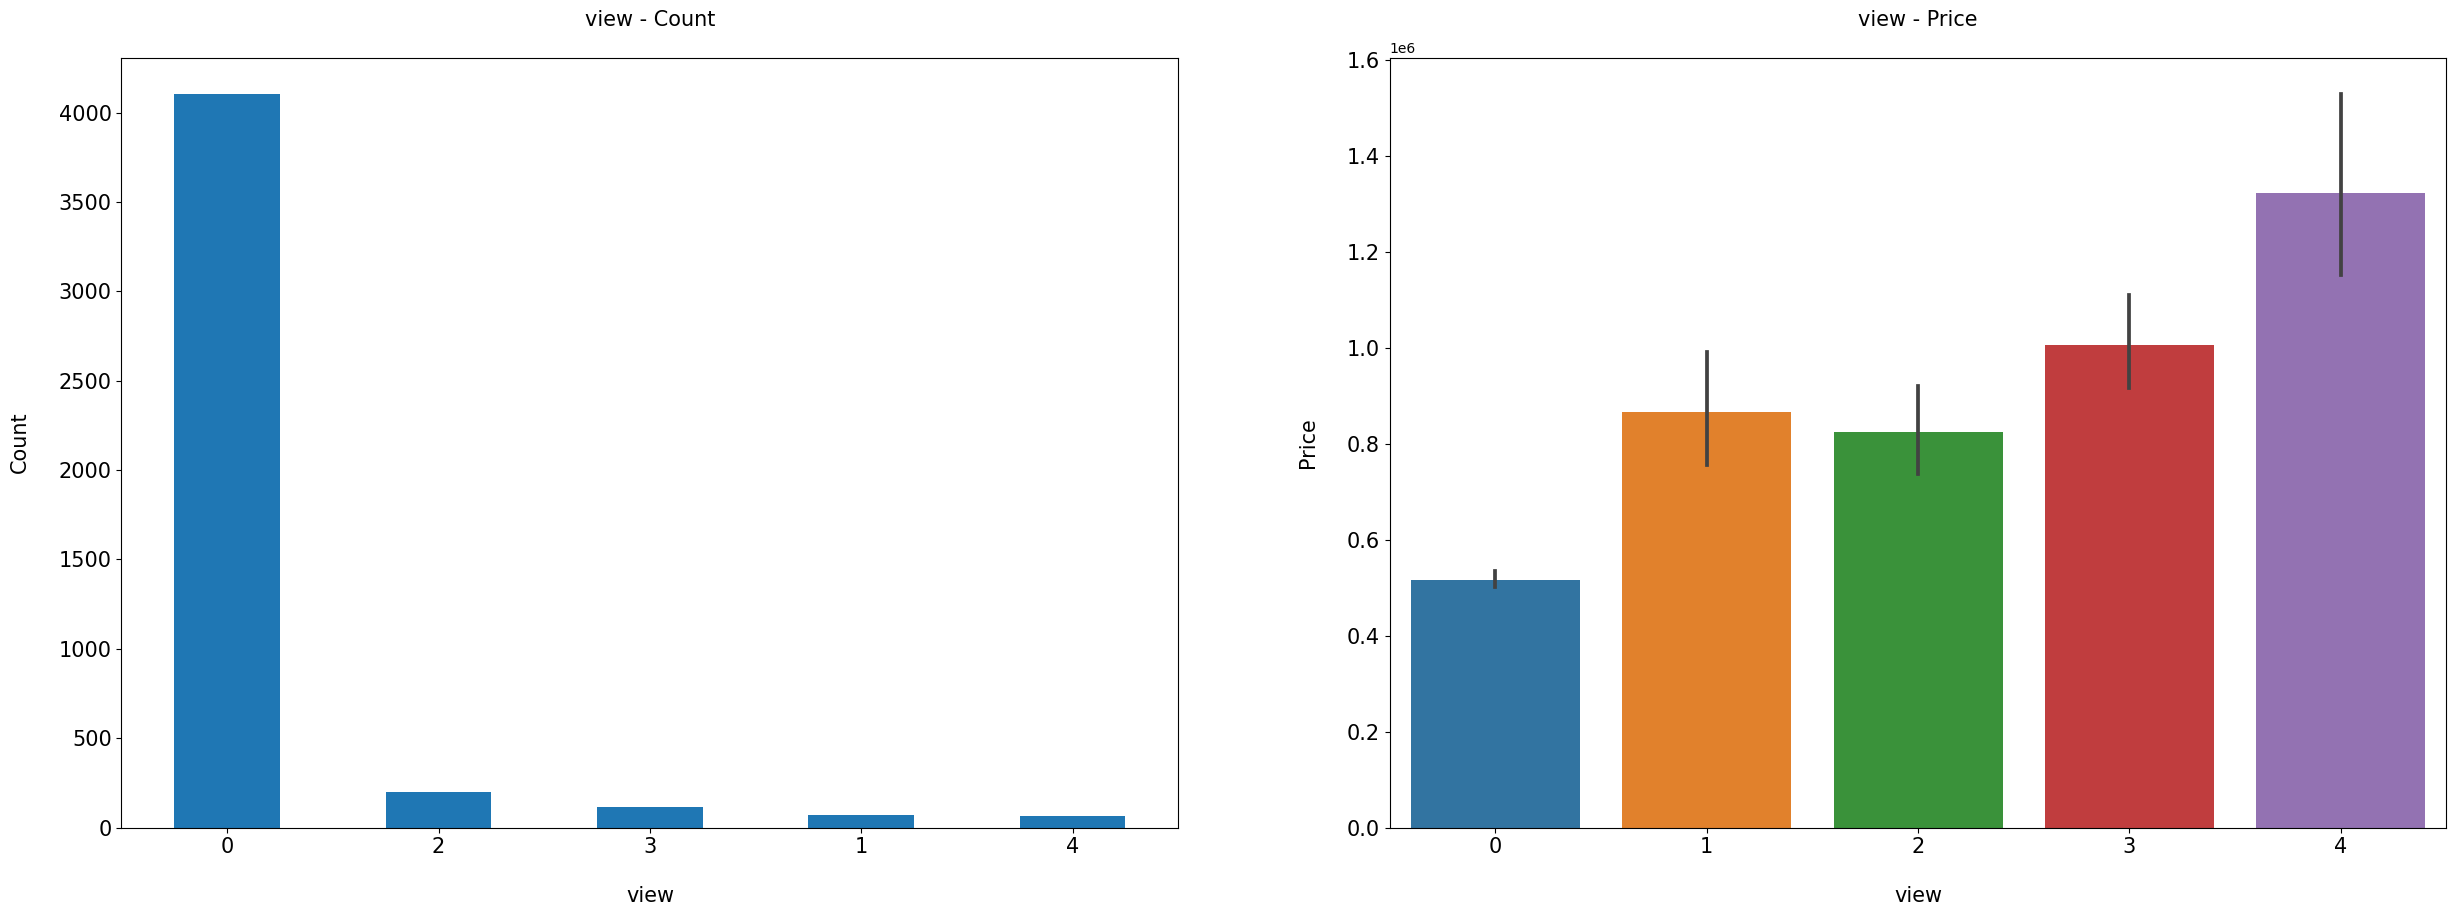

In [27]:
Categorical_Plot("view")

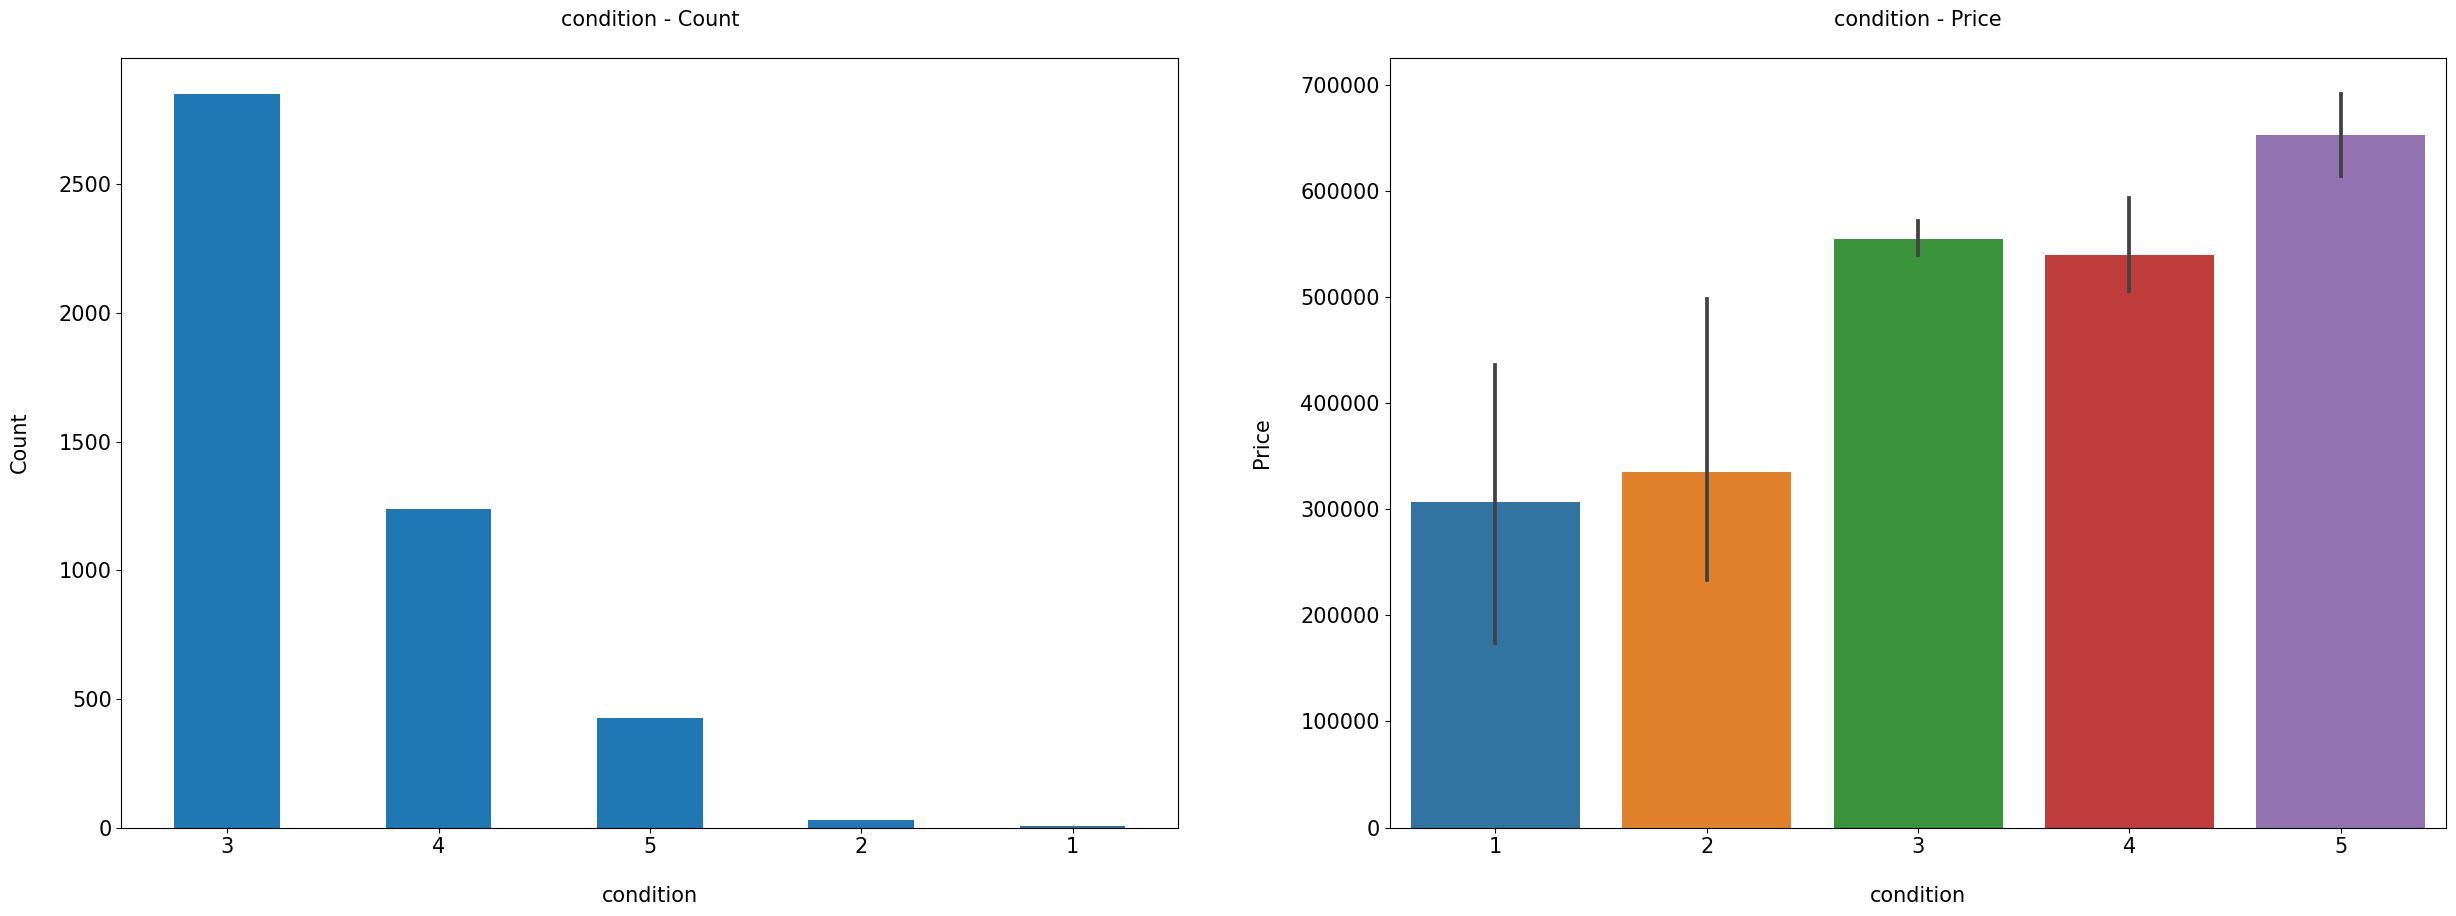

In [28]:
Categorical_Plot("condition")

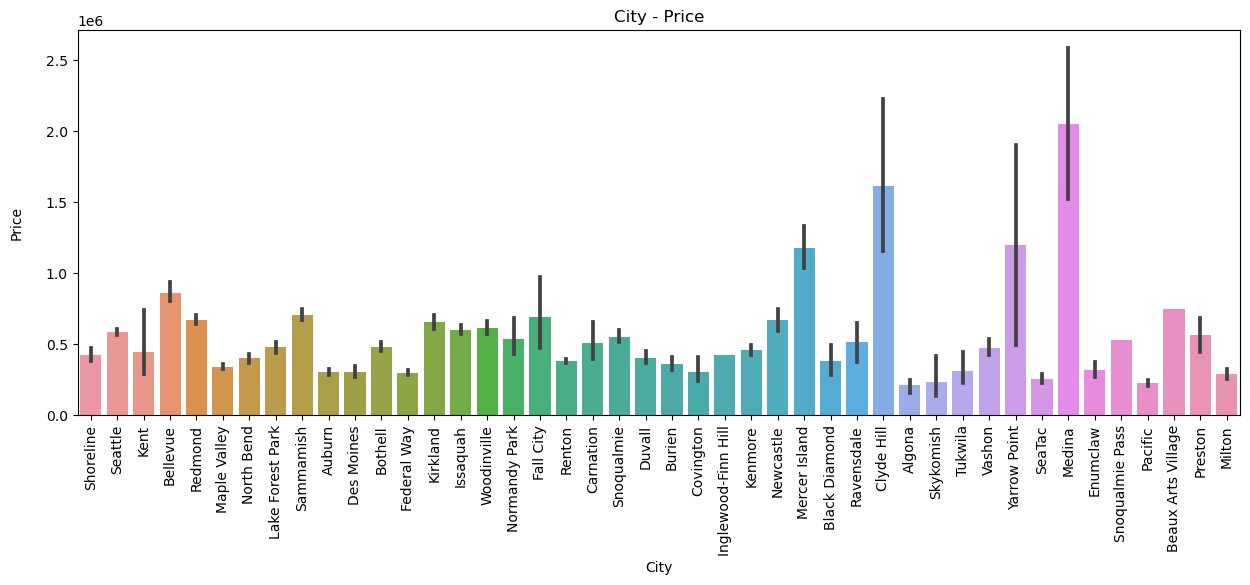

In [29]:
plt.figure(figsize=(15, 5))
sns.barplot(x = m_data['city'], y = m_data.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("City")
plt.title("City - Price")
plt.ylabel("Price\n")

plt.show()

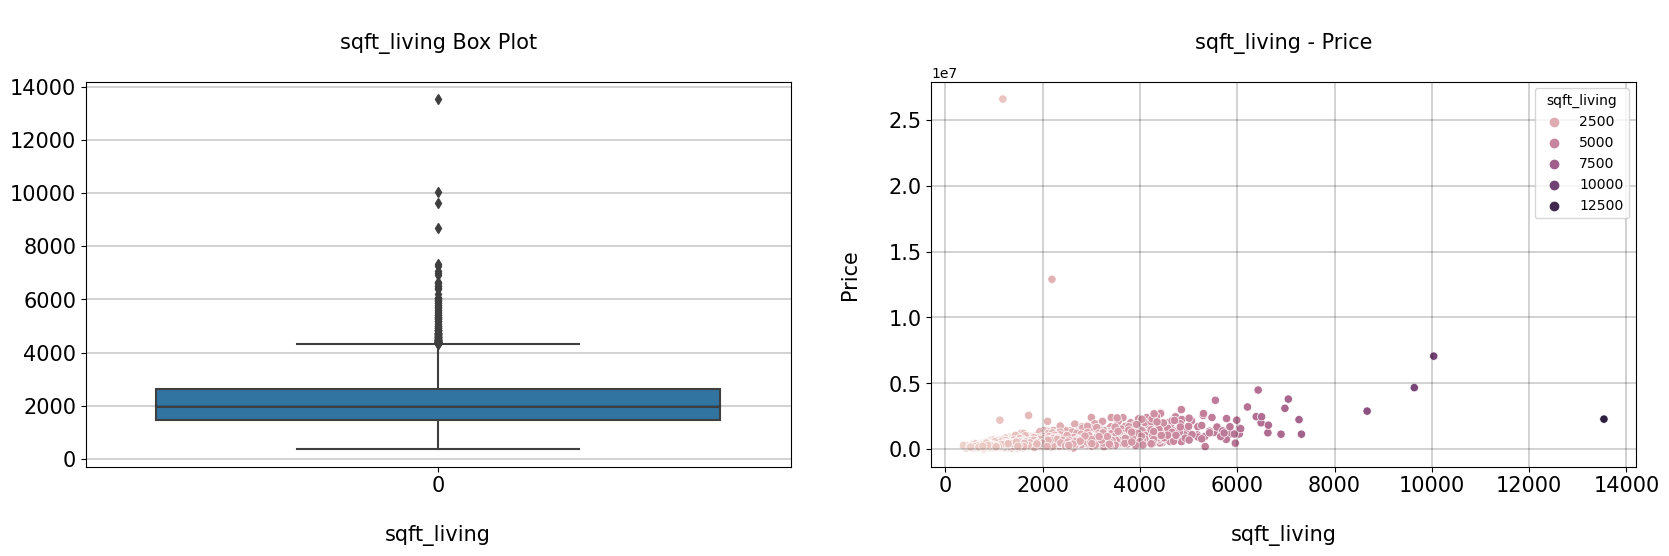

In [30]:
Numerical_Plot("sqft_living")

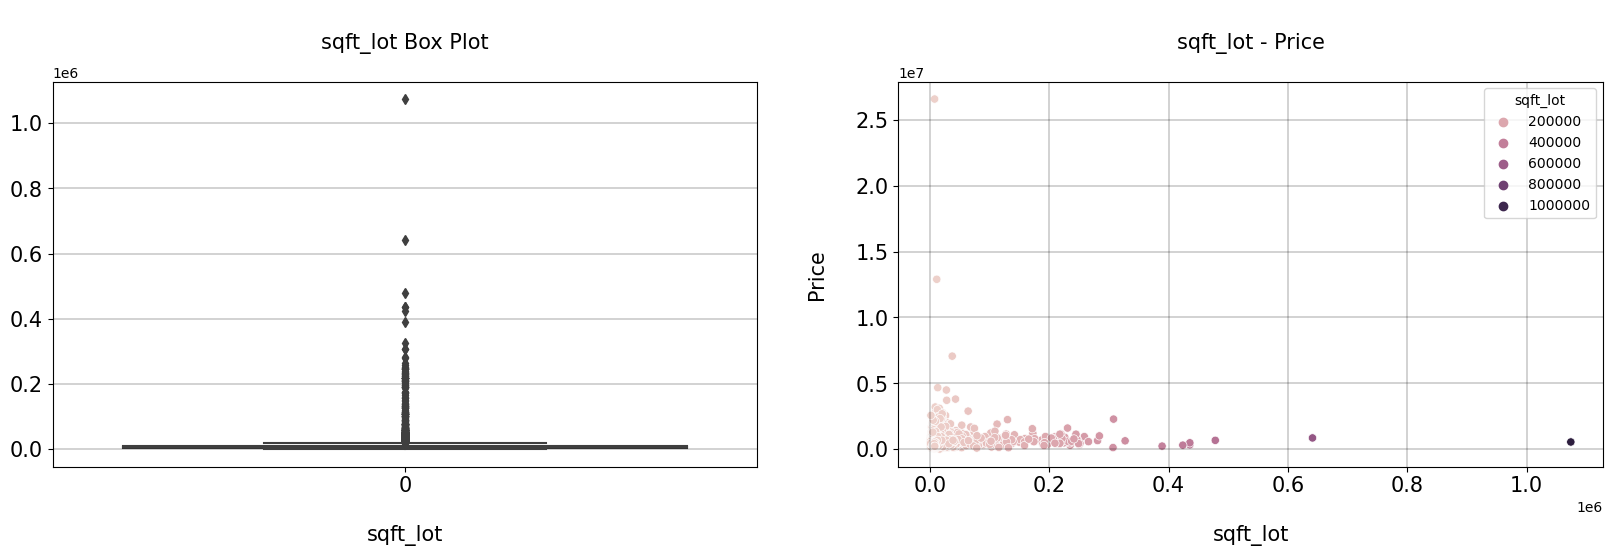

In [31]:
Numerical_Plot("sqft_lot")

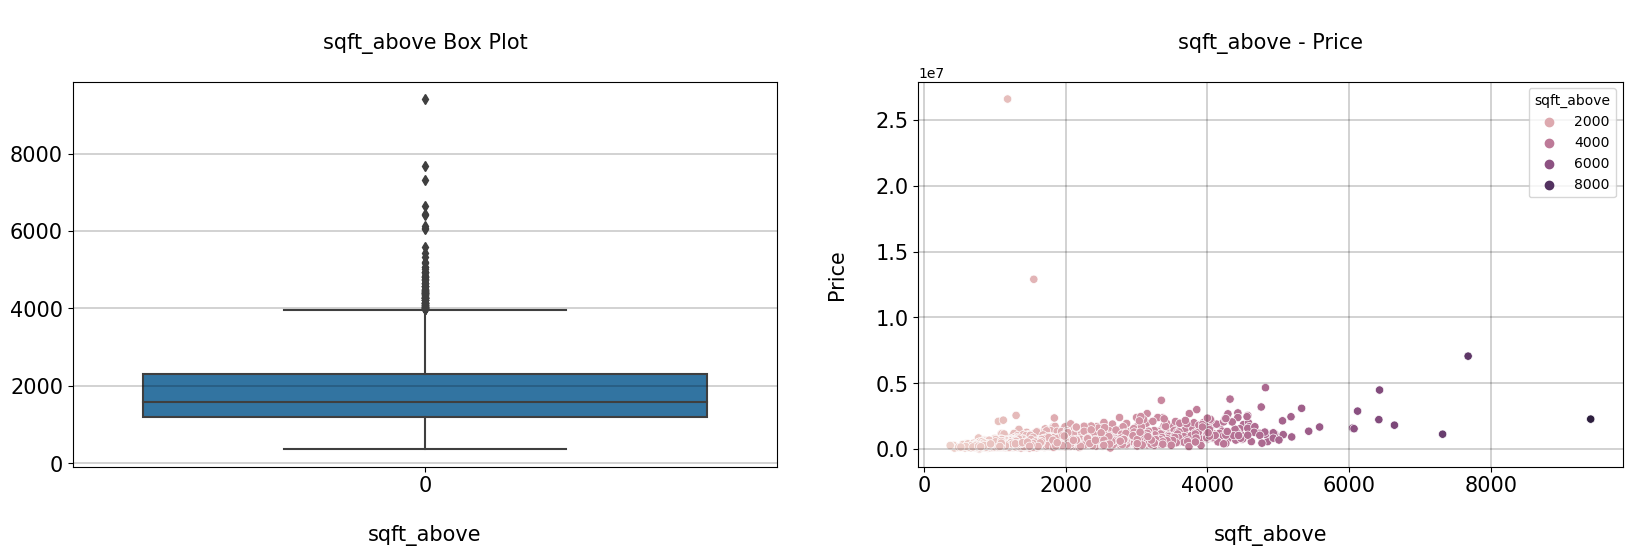

In [32]:
Numerical_Plot("sqft_above")

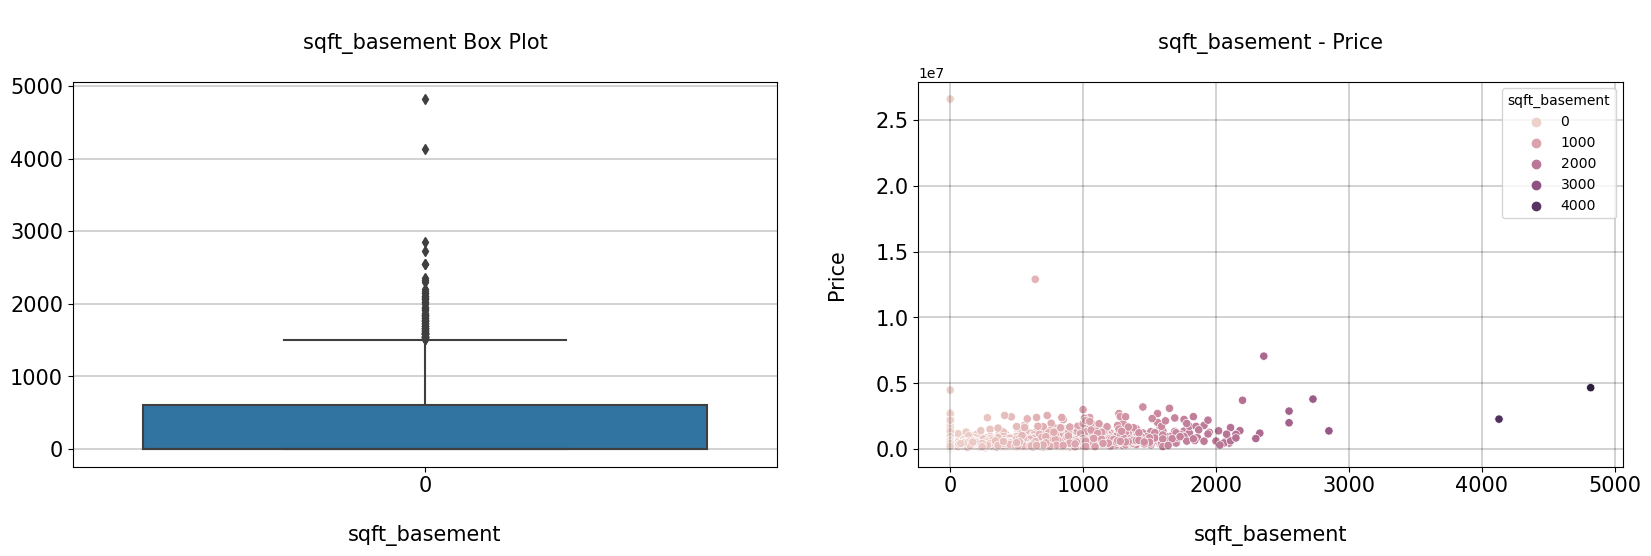

In [33]:
Numerical_Plot("sqft_basement")

In [35]:
house = pd.get_dummies(m_data, columns=['city'], prefix = ['city'])

In [37]:
house = house.drop(['street', 'statezip', 'country','sqft_above'], axis = 1)
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3,1,1340,7912,1,0,0,3,0,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5,2,3650,9050,2,0,4,5,280,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2,2000,8030,1,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2,1940,10500,1,0,0,4,800,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.0,3,1,1510,6360,1,0,0,4,0,...,0,1,0,0,0,0,0,0,0,0
4596,534333.0,3,2,1460,7573,2,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4597,416904.0,3,2,3010,7014,2,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4598,203400.0,4,2,2090,6630,1,0,0,3,1020,...,0,1,0,0,0,0,0,0,0,0


In [38]:
columns = house.columns

In [40]:
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
normal = pd.DataFrame(scaler.fit_transform(house), columns = columns)
normal.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.011481,0.333333,0.125,0.073652,0.006775,0.0,0.0,0.0,0.50,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.089391,0.555556,0.250,0.249051,0.007835,0.5,0.0,1.0,1.00,0.058091,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.012572,0.333333,0.250,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.015507,0.333333,0.250,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.020397,0.444444,0.250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.018140,0.222222,0.125,0.038724,0.005348,0.0,0.0,0.0,0.50,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.012309,0.222222,0.250,0.074412,0.001790,0.0,0.0,0.0,0.50,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.017839,0.444444,0.250,0.177677,0.032815,0.5,0.0,0.0,0.50,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.016729,0.333333,0.250,0.156416,0.081771,0.0,0.0,0.0,0.75,0.178423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.023783,0.444444,0.250,0.087320,0.005181,0.0,0.0,0.0,0.50,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
x = normal.drop("price", axis=1)
y = pd.DataFrame(normal["price"])

In [ ]:
random_indicies = np.random.permutation()

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =43 )

In [43]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3640, 55)
(3640, 1)
(911, 55)
(911, 1)


In [44]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [45]:
Y_pred

array([[0.00218201],
       [0.01409531],
       [0.00576019],
       [0.03501892],
       [0.02043533],
       [0.00935745],
       [0.0161171 ],
       [0.00981903],
       [0.0085144 ],
       [0.01549911],
       [0.01494217],
       [0.03783035],
       [0.03030396],
       [0.02222443],
       [0.01498413],
       [0.02315521],
       [0.01818085],
       [0.00967026],
       [0.01213837],
       [0.01400375],
       [0.02080154],
       [0.00668716],
       [0.02930069],
       [0.01835632],
       [0.01756668],
       [0.01969528],
       [0.0218277 ],
       [0.02451324],
       [0.01901627],
       [0.01920319],
       [0.02523804],
       [0.01939774],
       [0.01676941],
       [0.01502228],
       [0.01152802],
       [0.02180481],
       [0.01647568],
       [0.0206604 ],
       [0.01449966],
       [0.01861572],
       [0.0279274 ],
       [0.04680252],
       [0.02260208],
       [0.00304413],
       [0.0170517 ],
       [0.01785278],
       [0.01182175],
       [0.020

In [46]:
# Evalutions

# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))

# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))

# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

#R2 Score
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error     :  0.004753119307216482
Mean Squared Error      :  7.785167985199036e-05
Root Mean Squared Error :  0.008823359895866786
R2 Score                :  0.6672953022329413
